In [91]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import scipy
from scipy import sparse as sp
from sklearn.decomposition import TruncatedSVD
import matplotlib
from scipy.sparse import coo_matrix

%matplotlib inline
# import plotly.offline as py
# py.init_notebook_mode(connected=True)
# import plotly.graph_objs as go
# import plotly.tools as tls

# print(check_output(["ls", "../input"]).decode("utf8"))

In [8]:
df = pd.read_csv("train-3.csv").fillna("")
df.head() 

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [7]:
dfq1, dfq2 = df[['qid1', 'question1']], df[['qid2', 'question2']]
dfq1.columns = ['qid1', 'question']
dfq2.columns = ['qid2', 'question']

# merge two two dfs, there are two nans for question
dfqa = pd.concat((dfq1, dfq2), axis=0).fillna("")

In [12]:
dfq1.head()

,qid1,question
0,1,What is the step by step guide to invest in sh...
1,3,What is the story of Kohinoor (Koh-i-Noor) Dia...
2,5,How can I increase the speed of my internet co...
3,7,Why am I mentally very lonely? How can I solve...
4,9,"Which one dissolve in water quikly sugar, salt..."


In [10]:
dfqa.head()

,qid1,qid2,question
0,1,,What is the step by step guide to invest in sh...
1,3,,What is the story of Kohinoor (Koh-i-Noor) Dia...
2,5,,How can I increase the speed of my internet co...
3,7,,Why am I mentally very lonely? How can I solve...
4,9,,"Which one dissolve in water quikly sugar, salt..."


In [15]:
dfqa.shape

(808580, 3)

In [73]:
mq1 = TfidfVectorizer(max_features = 1000).fit_transform(dfqa['question'].values)

In [83]:
doc1, doc2 = dfqa[dfqa['qid1']==1], dfqa[dfqa['qid2'] == 2]

In [87]:
r1 = scipy.dot(mq1[0,:].T, mq1[1,:])
r1.shape

(1000, 1000)

In [79]:
scipy.sparse.coo.coo_matrix(r1)

<1000x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 50 stored elements in COOrdinate format>

In [76]:
clf = TruncatedSVD(100)
Xpca = clf.fit_transform(r1)

In [77]:
clf.singular_values_

array([1.00000000e+00, 9.99200722e-17, 9.99200722e-17, 9.99200722e-17,
       9.99200722e-17, 9.99200722e-17, 9.99200722e-17, 9.99200722e-17,
       9.99200722e-17, 9.99200722e-17, 9.99200722e-17, 9.99200722e-17,
       9.99200722e-17, 9.99200722e-17, 9.99200722e-17, 9.99200722e-17,
       9.99200722e-17, 9.99200722e-17, 9.99200722e-17, 9.99200722e-17,
       9.99200722e-17, 9.99200722e-17, 9.99200722e-17, 9.99200722e-17,
       9.99200722e-17, 9.99200722e-17, 9.99200722e-17, 9.99200722e-17,
       9.99200722e-17, 9.99200722e-17, 9.99200722e-17, 9.99200722e-17,
       9.99200722e-17, 9.99200722e-17, 9.99200722e-17, 9.99200722e-17,
       9.99200722e-17, 9.99200722e-17, 9.99200722e-17, 9.99200722e-17,
       9.99200722e-17, 9.99200722e-17, 9.99200722e-17, 9.99200722e-17,
       9.99200722e-17, 9.99200722e-17, 9.99200722e-17, 9.99200722e-17,
       9.99200722e-17, 9.99200722e-17, 9.99200722e-17, 9.99200722e-17,
       9.99200722e-17, 9.99200722e-17, 9.99200722e-17, 9.99200722e-17,
      

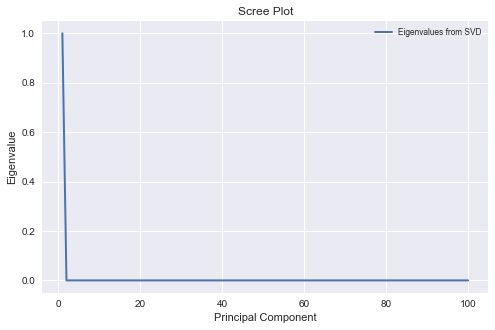

In [88]:
# eigvals = S**2 / np.cumsum(clf.singular_values_)[-1]

fig = plt.figure(figsize=(8,5))
sing_vals = np.arange(100) + 1
plt.plot(sing_vals, clf.singular_values_, linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Eigenvalue')
#I don't like the default legend so I typically make mine like below, e.g.
#with smaller fonts and a bit transparent so I do not cover up data, and make
#it moveable by the viewer in case upper-right is a bad place for it 
leg = plt.legend(['Eigenvalues from SVD'], loc='best', borderpad=0.3, 
                 shadow=False, prop=matplotlib.font_manager.FontProperties(size='small'),
                 markerscale=0.4)
leg.get_frame().set_alpha(0.4)
leg.draggable(state=True)
plt.show()

In [95]:
def plot_coo_matrix(m):
    if not isinstance(m, coo_matrix):
        m = coo_matrix(m)
    fig = plt.figure(figsize= (10,10))
    ax = fig.add_subplot(111, axisbg='black')
    ax.plot(m.col, m.row, 's', color='white', ms=1)
    ax.set_xlim(0, m.shape[1])
    ax.set_ylim(0, m.shape[0])
    ax.set_aspect('equal')
    for spine in ax.spines.values():
        spine.set_visible(False)
    ax.invert_yaxis()
    ax.set_aspect('equal')
    ax.set_xticks([])
    ax.set_yticks([])
    return ax

/Users/ranlin/anaconda/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/Users/ranlin/anaconda/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


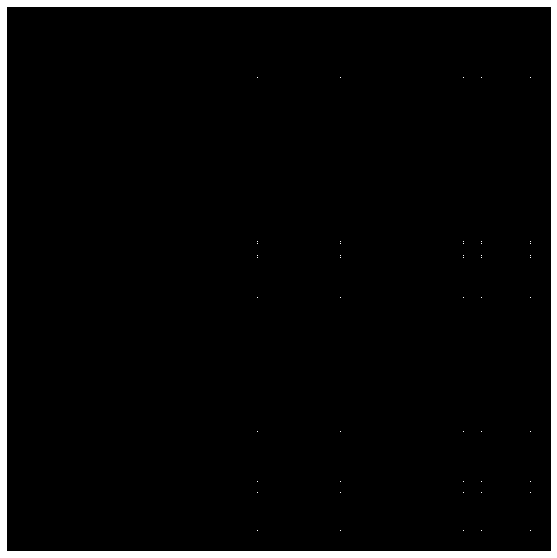

In [101]:
m = coo_matrix(np.ceil(r1))
ax = plot_coo_matrix(m)
ax.figure.show()